In [19]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import pickle
import cv2
import imutils
import random
import re
from tqdm import tqdm
import matplotlib.image as mpimg
import itertools
%matplotlib inline

In [46]:
background_images = []
for i in range(1,2):
    img=mpimg.imread('./maps/map_crop_0'+str(i)+'.jpg')
    background_images.append(img)
def get_random_crop():
    image_number = random.randint(1,1)
    img = background_images[image_number-1]
    #print(img.shape)
    height,width = img.shape[0],img.shape[1]
    start_row = random.randint(0,height-227)
    start_column = random.randint(0,width-227)
    new_img = img[start_row:start_row+227,start_column:start_column+227,:]
    new_img = new_img[...,list(list(itertools.permutations([0, 1, 2]))[random.randint(0,5)])]
    #print new_img.shape
    return new_img

def merge_background_text(img, bg_image):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j,0] == 0 and img[i,j,1] == 0 and img[i,j,2] == 0:
                bg_image[i,j,:] = 0
    return bg_image

def getWordList():
    word_list = []
    f = open('high_frequency_english_words.txt','rb')
    word_list = f.readlines()
    f.close()
    
    for i,line in enumerate(word_list):
        word_list[i] = line.lower()
        word_list[i] = re.sub(r'[^a-zA-Z0-9]','',line)
        word_list[i] = re.sub(r'[\n\r]','',line)
        word_list[i] = line.lower()
    
    return word_list
    

def changeCase(word):
    case = random.randint(0,2)
    
    #Explicitly getting capital words. Uncomment following line to get all types.
    case = 2
    
    
    if case == 0:
        # get lowercase word
        return word.lower()
    elif case == 1:
        # get camelcase word
        return word[0].upper()+word[1:]
    else:
        # get uppercase word
        return word.upper()

def getImageFromWord(word):
    word = changeCase(word)
    
    height, width = 512, 512
    img = np.zeros((height,width,3), np.uint8)
    img[:,:,:] = 255
    
    font                   = random.choice([0,1,2,3,4]) | 16 if random.randint(0,1) else 0
    bottomLeftCornerOfText = (30,150)
    fontScale              = 5
    fontColor              = (0,0,0)
    lineType               = random.randint(2,4)
    thickness              = 6
    lineType               = 8
    
    while True:
        textsize = cv2.getTextSize(word, font, fontScale, lineType)[0]
        if textsize[0] < width - 20:
            break
        else:
            fontScale -= 1
            
    #print textsize
    
    # get coords based on boundary
    textX = (img.shape[1] - textsize[0]) / 2
    textY = (img.shape[0] + textsize[1]) / 2

    # add text centered on image
    cv2.putText(img, word, (textX, textY ), font, fontScale, fontColor, lineType)
    
    rotateFlag = random.randint(0,1)
    if rotateFlag:
        rotateAngle = random.randint(-10,10)
        M = cv2.getRotationMatrix2D((width/2,height/2),rotateAngle,1)
        img = cv2.warpAffine(img,M,(width,height),borderValue=(255,255,255))
    
    affineFlag = random.randint(0,1)
    if affineFlag:
        pts1 = np.float32([[10,10],[200,50],[50,200]])
        pts2 = np.float32([[10+random.randint(-20,20),30+random.randint(-20,20)]
                           ,[200,50],
                           [50+random.randint(-20,20),200+random.randint(-20,20)]])

        M = cv2.getAffineTransform(pts1,pts2)
        img = cv2.warpAffine(img,M,(width,height),borderValue=(255,255,255))
    
    img = cv2.resize(img, (227, 227))
    bg_image = get_random_crop()
    bg_image = merge_background_text(img, bg_image)
    #print(bg_image.shape)
    #img = np.add(img,bg_image)
    #plt.imshow(img)
    #print img.shape
    
    return bg_image

def generateData():
    word_list = getWordList()
    #print word_list
    trainFile = open('word_train_with_bg.txt','wb')
    valFile = open('word_val_with_bg.txt','wb')
    testFile = open('word_test_bg.txt','wb')
    
    SAVE_DIR = '/Users/abhaydoke/Downloads/word_image_data_bg/'
    classLabel = 0
    #word_list = ["the"]
    for word in tqdm(word_list):
        word = re.sub(r'[^a-zA-Z0-9]','',word)
        for i in xrange(150):
            img = getImageFromWord(word)
            cv2.imwrite(SAVE_DIR+word+str(i)+'.png', img)
            if i<100:
                trainFile.write('./word_image_data_bg/'+word+str(i)+'.png'+' '+str(classLabel)+'\n')
            elif i>=100 and i < 120:
                valFile.write('./word_image_data_bg/'+word+str(i)+'.png'+' '+str(classLabel)+'\n')
            else:
                testFile.write('./word_image_data_bg/'+word+str(i)+'.png'+' '+str(classLabel)+'\n')
        classLabel+=1
    trainFile.close()
    valFile.close()
    testFile.close()

In [ ]:
#getImageFromWord("sdfsdfsdfdf")
generateData()

  0%|          | 3/999 [01:30<8:20:18, 30.14s/it]

In [27]:
word_list = getWordList()
s = getImageFromWord("abhay")

(227, 227, 3)


In [8]:
f = open('word_labels.csv','wb')
for i in range(len(word_list)):
    f.write(str(i)+","+word_list[i])
f.close()

In [9]:
f = open('word_train.txt','rb')
f1 = open('word_train_2_classes.txt','wb')
for line in f.readlines():
    label = line.split(" ")[1]
    if label == "0\n" or label == "1\n":
        f1.write(line)
f.close()
f1.close()

f = open('word_val.txt','rb')
f1 = open('word_val_2_classes.txt','wb')
for line in f.readlines():
    label = line.split(" ")[1]
    if label == "0\n" or label == "1\n":
        f1.write(line)
f.close()
f1.close()


In [69]:
background_images = []
for i in range(1,9):
    img=mpimg.imread('map_crop_0'+str(i)+'.jpg')
    background_images.append(img)
def get_random_crop():
    image_number = random.randint(1,8)
    img = background_images[image_number-1]
    height,width = img.shape[0],img.shape[1]
    start_row = random.randint(0,height-256)
    start_column = random.randint(0,width-256)
    new_img = img[start_row:start_row+256,start_column:start_column+256,:]
    print(new_img.shape)
    return new_img

(256, 256, 3)


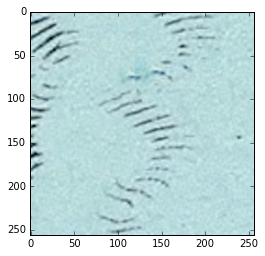

In [139]:
img = get_random_crop()

plt.imshow(new_img)

In [4]:
img = np.zeros((10,10,3), np.uint8)

In [6]:
img[:,:,:] = 255